# Example notebook for Ensemble of Zonal (lev-lon) diagnostic of temperature

##### This notebook demonsterates how the ensemble module can be used for Zonal data (lev-lon) temperature data from a single ensemble or multi-model ensemble memebers

In [1]:
import glob
import xarray as xr
from aqua.diagnostics import merge_from_data_files
from aqua.diagnostics import EnsembleZonal
from aqua.diagnostics import PlotEnsembleZonal

/work/ab0995/a270260/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
# loading the data as xarray Datasets
# Here we are using two same files because we have only this file yet with same lev-lat
# loading the Zonal Datasets 
file_0 = '/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-NEMO/historical-1990/ocean3d_drift/netcdf/IFS-NEMO-historical-1990-lra-r100-monthly_zonal_mean_trend_atlantic_ocean.nc'
file_1 = '/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-NEMO/historical-1990/ocean3d_drift/netcdf/IFS-NEMO-historical-1990-lra-r100-monthly_zonal_mean_trend_atlantic_ocean.nc'
file_list = [file_0, file_1]

In [3]:
# path on lumi
# IFS-NEMO: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/ocean3d_drift/netcdf/IFS-NEMO-historical-1990-lra-r100-monthly_zonal_mean_trend_atlantic_ocean.nc

In [4]:
# merging the dataset along the dimension ens_dim
# ens_dim="ensemble" name can be changed. 
# It should remain consistent with the ensemble name for the EnsembleZonal class variable
ens_dataset = merge_from_data_files(variable='avg_so', data_path_list=file_list, loglevel = "WARNING",ens_dim="ensemble")

In [5]:
# from collections import Counter
# len(ens_dataset.model)
model_counts = ens_dataset.model.values
model_counts

array(['model_name', 'model_name'], dtype='<U10')

In [6]:
zonal_ens = EnsembleZonal(var='avg_so', dataset=ens_dataset)

In [7]:
zonal_ens.run()

In [8]:
var = 'avg_so'
plot_class_arguments = {
    "model_list": ['IFS-NEMO', 'IFS-NEMO']
}

plot_arguments = {
    "var": var,
    "save_pdf": True,
    "save_png": True,
    "title_mean":  'Mean of Ensemble of Zonal-average of avg_so',
    "title_std": 'Standard deviation of Ensemble of Zonal-average of avg_so',
    "cbar_label": 'Time-mean sea water practical salinity g kg**-1/year',
    "dataset_mean" : zonal_ens.dataset_mean, 
    "dataset_std" :zonal_ens.dataset_std}

In [9]:
ens_zm_plot = PlotEnsembleZonal(**plot_class_arguments)

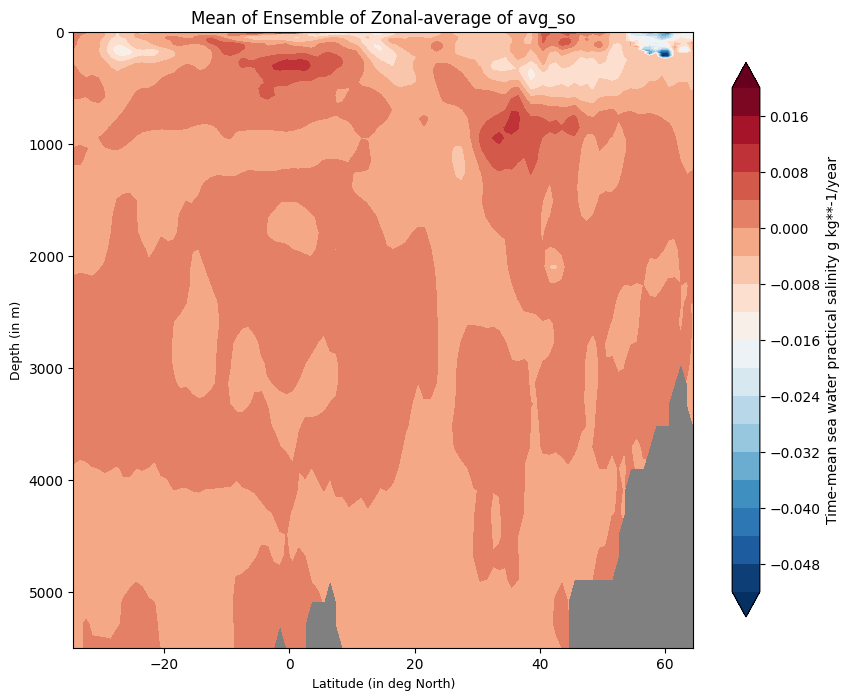

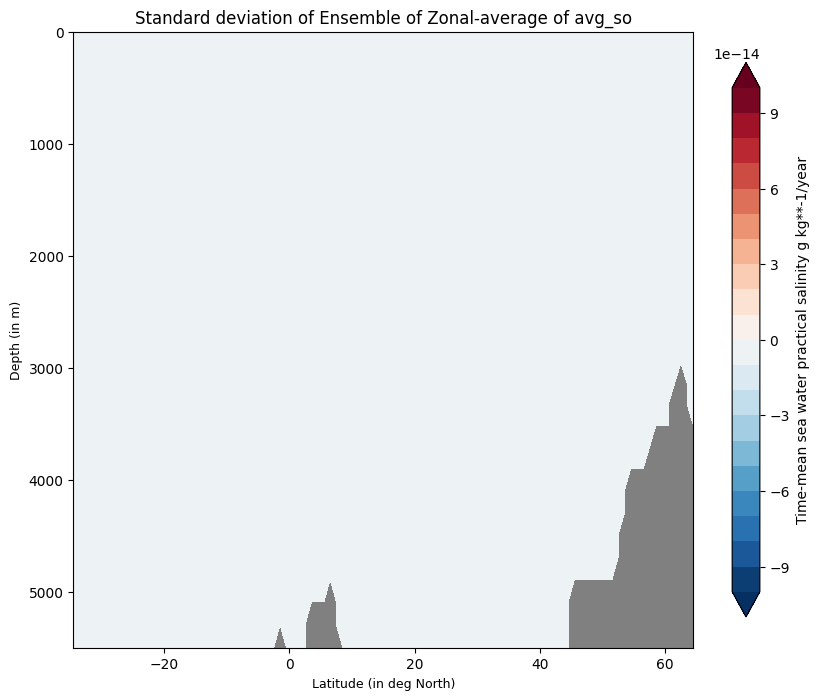

In [10]:
plot_dict = ens_zm_plot.plot(**plot_arguments)

In [11]:
plot_dict['mean_plot'][0] == None 

False

In [12]:
zonal_ens.dataset_mean

<xarray.DataArray 'avg_so' (lev: 75, lat: 100)> Size: 60kB
array([[ 0.0027187 ,  0.00079101,  0.00021471, ..., -0.02185529,
        -0.01881303, -0.02083444],
       [ 0.00271641,  0.00078443,  0.00019752, ..., -0.02189137,
        -0.01884648, -0.02088786],
       [ 0.00269767,  0.00077687,  0.00018432, ..., -0.02189318,
        -0.01888041, -0.02091277],
       ...,
       [-0.00020461, -0.00027314,  0.00015111, ...,         nan,
                nan,         nan],
       [        nan,  0.00015082,  0.00015082, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], shape=(75, 100))
Coordinates:
  * lev      (lev) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * lat      (lat) float64 800B -34.5 -33.5 -32.5 -31.5 ... 61.5 62.5 63.5 64.5
Attributes:
    AQUA diagnostic:  EnsembleZonal
    AQUA catalog:     ['ensemble_catalog']
    model:            ['ensemble_model']
    experiment:       ['ensemble_exp']
    description:      ensemble EnsembleZonal for ['ensemble_catalog'] and ['e...

In [13]:
zonal_ens.dataset_std

<xarray.DataArray 'avg_so' (lev: 75, lat: 100)> Size: 60kB
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [nan,  0.,  0., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(75, 100))
Coordinates:
  * lev      (lev) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * lat      (lat) float64 800B -34.5 -33.5 -32.5 -31.5 ... 61.5 62.5 63.5 64.5
Attributes:
    AQUA diagnostic:  EnsembleZonal
    AQUA catalog:     ['ensemble_catalog']
    model:            ['ensemble_model']
    experiment:       ['ensemble_exp']
    description:      ensemble EnsembleZonal for ['ensemble_catalog'] and ['e...

In [14]:
ens_dataset.avg_so

<xarray.DataArray 'avg_so' (ensemble: 2, lev: 75, lat: 100)> Size: 120kB
array([[[ 0.0027187 ,  0.00079101,  0.00021471, ..., -0.02185529,
         -0.01881303, -0.02083444],
        [ 0.00271641,  0.00078443,  0.00019752, ..., -0.02189137,
         -0.01884648, -0.02088786],
        [ 0.00269767,  0.00077687,  0.00018432, ..., -0.02189318,
         -0.01888041, -0.02091277],
        ...,
        [-0.00020461, -0.00027314,  0.00015111, ...,         nan,
                 nan,         nan],
        [        nan,  0.00015082,  0.00015082, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.0027187 ,  0.00079101,  0.00021471, ..., -0.02185529,
         -0.01881303, -0.02083444],
        [ 0.00271641,  0.00078443,  0.00019752, ..., -0.02189137,
         -0.01884648, -0.02088786],
        [ 0.00269767,  0.00077687,  0.00018432, ..., -0.02189318,
         -0.01888041, -0.02091277],
        ...,
        [-0.00020461, -0.00027314,  0.00015111, ...,         nan,
                 nan,         nan],
        [        nan,  0.00015082,  0.00015082, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], shape=(2, 75, 100))
Coordinates:
  * ensemble  (ensemble) int64 16B 0 1
  * lev       (lev) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * lat       (lat) float64 800B -34.5 -33.5 -32.5 -31.5 ... 61.5 62.5 63.5 64.5
    model     (ensemble) <U10 80B 'model_name' 'model_name'
Attributes:
    units:    g kg**-1/year